# Seasonal Mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Tue May 22 17:15:15 EDT 2018
[Start] matplotlib settings: ####################
Python: 3.6.5
matplotlib: 2.2.2 backend nbAgg
interactive = True
figure.max_open_warning = 50
hatch.linewidth = 0.5
hatch.color = gray
legend.frameon = False
savefig.bbox = tight
savefig.format = pdf
[End] matplotlib settings. ####################


In [6]:
# parameters
data_names = ['precip', ]
figname = f'fig_seasonalMean_JJA_{data_names[0]}.pdf'
prcp_scale = 3600 * 24

enso = dict(
    nino=[7,  9, 12, 15, 17, 20, 22, 24, 27, 30],
    nina=[2,  6,  8, 13, 14, 18, 21, 25, 28, 29],
    neut=[1, 3, 4, 5, 10, 11, 16, 19, 23, 26]
)

### Agung data

In [3]:
# Agung data
year_volc = 1963
season = slice(f'{year_volc+1}-06', f'{year_volc+1}-08')
daas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    for key in enso.keys():
        da = daa.sel(time=season, en=enso[key]).mean('time') # seasonal mean
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en').load()
        pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

        daas_agung[key] = dict()
        daas_agung[key]['da'] = da
        daas_agung[key]['pvalue'] = pvalue


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### StMaria data

In [4]:
# St Maria data
year_volc = 1902
season = slice(f'{year_volc+1}-06', f'{year_volc+1}-08')
daas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    for key in enso.keys():
        da = daa.sel(time=season, en=enso[key]).mean('time') # seasonal mean
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en').load()
        pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

        daas_stmaria[key] = dict()
        daas_stmaria[key]['da'] = da
        daas_stmaria[key]['pvalue'] = pvalue

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Plot

<IPython.core.display.Javascript object>


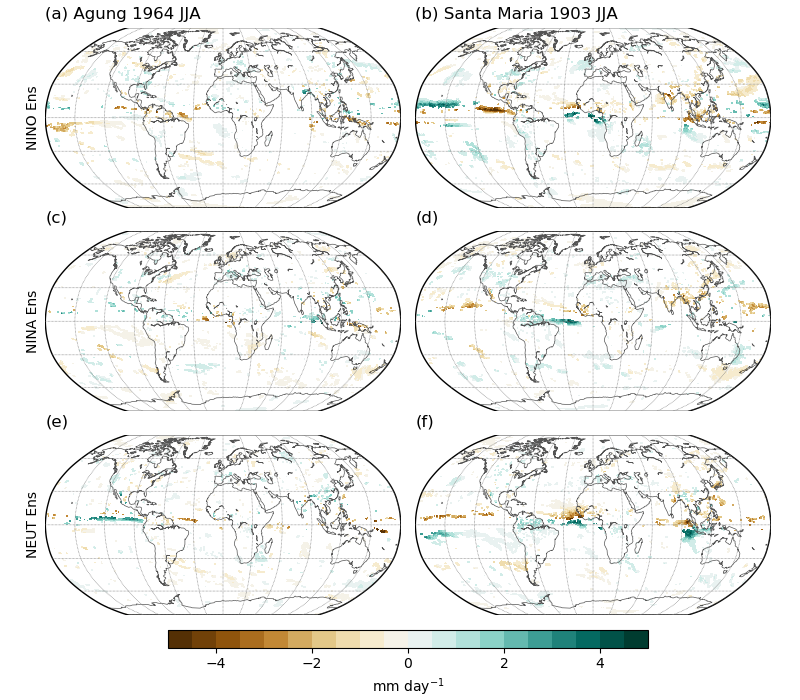

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [7]:
# plot
rcParams['hatch.color'] = 'gray'
hatch_pattern = ['.....']
lon_0 = 0
proj = 'robin'
# levels = 10
levels = np.arange(-5,5+.01,0.5)
add_colorbar = False

fig, axes = plt.subplots(3,2,figsize=(8,7), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
key = 'nino'

da = daas_agung[key]['da'] # 
pvalue = daas_agung[key]['pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.ylabel(f'{key.upper()} Ens')
plt.title('(a) Agung 1964 JJA', loc='left')

# ############
plt.sca(axes[0,1])
key = 'nino'

da = daas_stmaria[key]['da'] # 
pvalue = daas_stmaria[key]['pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(b) Santa Maria 1903 JJA', loc='left')


# ############
plt.sca(axes[1,0])
key = 'nina'

da = daas_agung[key]['da'] # 
pvalue = daas_agung[key]['pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.ylabel(f'{key.upper()} Ens')
plt.title('(c)', loc='left')

# ############
plt.sca(axes[1,1])
key = 'nina'

da = daas_stmaria[key]['da'] # 
pvalue = daas_stmaria[key]['pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(d)', loc='left')

# ############
plt.sca(axes[2,0])
key = 'neut'

da = daas_agung[key]['da'] # 
pvalue = daas_agung[key]['pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.ylabel(f'{key.upper()} Ens')
plt.title('(e)', loc='left')

# ############
plt.sca(axes[2,1])
key = 'neut'

da = daas_stmaria[key]['da'] # 
pvalue = daas_stmaria[key]['pvalue']
im = da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels, proj=proj, cmap='BrBG', cbar_on=add_colorbar)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(f)', loc='left')

# colorbar
# ax = plt.axes((.925,.2,.025,.6))
ax = plt.axes((.21,.075,.6,.025))
cbar = plt.colorbar(im, cax=ax, orientation='horizontal')
# cbar.ax.yaxis.set_label_position('right')
cbar.ax.set_xlabel('mm day$^{-1}$')

plt.tight_layout(rect=[0,.1,1,1], w_pad=-1)
plt.savefig(figname)